In [71]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Loading Data...

In [2]:
rooth_path = '../rawdata/training/'

In [3]:
failures_df = pd.read_csv(rooth_path + 'wind-farm-1-failures-training.csv')
locations_df = gpd.read_file(rooth_path + "wind-farm-1-locations.shp")
logs_df = pd.read_csv(rooth_path + 'wind-farm-1-logs-training.csv')
metmast_df = pd.read_csv(rooth_path + 'wind-farm-1-metmast-training.csv', sep=';')
signals_df = pd.read_csv(rooth_path + 'wind-farm-1-signals-training.csv', sep=';')
power_df = pd.read_csv(rooth_path + 'Power_curve.csv', sep=',')
costs_df = pd.read_csv(rooth_path + 'HTW_Costs.csv')

In [7]:
failures_df

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03T19:00:00+00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04T18:53:00+00:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30T12:40:00+00:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07T16:59:00+00:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10T03:46:00+00:00,High temperature transformer
5,T06,GENERATOR,2016-07-11T19:48:00+00:00,Generator replaced
6,T01,GEARBOX,2016-07-18T02:10:00+00:00,Gearbox pump damaged
7,T06,GENERATOR,2016-07-24T17:01:00+00:00,Generator temperature sensor failure
8,T09,GENERATOR_BEARING,2016-08-22T18:25:00+00:00,High temperature generator bearing
9,T07,TRANSFORMER,2016-08-23T02:21:00+00:00,High temperature transformer. Transformer refr...


In [8]:
failures_df['Remarks'].nunique()

19

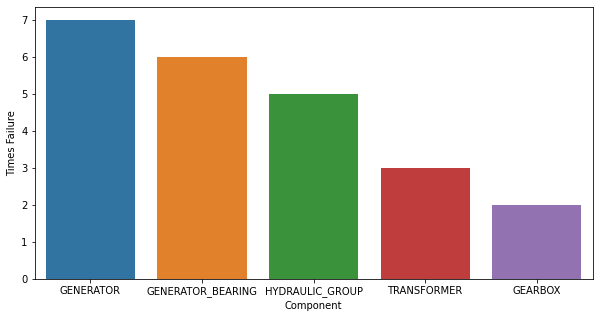

In [9]:
fig = plt.figure(figsize=(10,5))
nu = failures_df['Component'].value_counts().reset_index()
nu.columns = ['Component','Times Failure']
ax = sns.barplot(x='Component', y='Times Failure', data=nu)

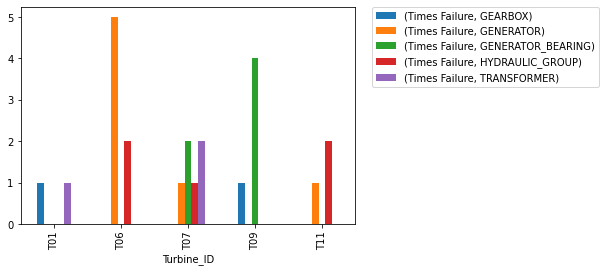

In [10]:
failures_df_by_turbine = failures_df.groupby(['Turbine_ID'])['Component'].value_counts()
failures_df_by_turbine = failures_df_by_turbine.to_frame()
failures_df_by_turbine.columns = ['Times Failure']
temp = failures_df_by_turbine.unstack()
temp.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [11]:
fg = sns.factorplot(x='Turbine_ID', y='Times Failure', 
                        col='Component', data=failures_df_by_turbine, kind='bar')

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Could not interpret input 'Turbine_ID'

In [ ]:
locations_df.head()

In [ ]:
logs_df.head()

In [ ]:
logs_df['Remark'].unique()

In [ ]:
metmast_df[210:220]

In [ ]:
signals_df

In [ ]:
power_df.head()

In [ ]:
costs_df.head()

# Data Cleaning

In [ ]:
## Drop columns 'Data set available' in locations_df and 'time reset' and 'unittitledestination' in logs_df
locations_df = locations_df.drop(columns='data_set_av')
logs_df = logs_df.drop(columns=['TimeReset', 'UnitTitleDestination'])

## Failures DF

In [ ]:
failures_df.dtypes

In [ ]:
failures_df['Timestamp'] = pd.to_datetime(failures_df['Timestamp'])

In [ ]:
failures_df.isnull().sum()

In [ ]:
failures_df.info()

In [ ]:
failures_df.describe()

## Logs DF

In [ ]:
logs_df

In [ ]:
logs_df.dtypes

In [ ]:
logs_df['TimeDetected'] = pd.to_datetime(logs_df['TimeDetected'])

In [ ]:
logs_df.dtypes

In [ ]:
logs_df.isnull().sum()

In [ ]:
logs_df.describe()

## Metmast DF

In [ ]:
metmast_df.dtypes

In [ ]:
metmast_df['Timestamp'] = pd.to_datetime(metmast_df['Timestamp'])

In [ ]:
metmast_df.describe()

In [ ]:
metmast_df.isnull().sum()

## Signals DF

In [ ]:
signals_df.dtypes

In [ ]:
signals_df['Timestamp'] = pd.to_datetime(signals_df['Timestamp'])

In [ ]:
signals_df.isnull().sum()

In [ ]:
signals_df.describe()

In [ ]:
signals_df.columns

In [ ]:
metmast_df.columns

# Data Exploration

In [ ]:
type(locations_df)

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(metmast_df['Timestamp'], metmast_df['Min_Windspeed1'])

In [ ]:
temp = metmast_df[(metmast_df['Timestamp'] > '2017') & (metmast_df['Timestamp'] < '2017-05-05')]

In [ ]:
temp.tail()

In [ ]:
fig = plt.figure(figsize=(20,10)) 
plt.plot(temp['Timestamp'], temp['Min_Windspeed1'])

In [ ]:
columns_metmast = metmast_df.columns

In [ ]:
for column in columns_metmast:
    fig = plt.figure(figsize=(20,10))
    plt.plot(metmast_df['Timestamp'], metmast_df[column])
    plt.title(column)

In [ ]:
columns_drop_metmast = ['Min_Raindetection', 'Avg_Raindetection', 'Avg_Raindetection', 'Anemometer1_Freq', 'Anemometer1_Offset', 'Anemometer1_CorrGain', 'Anemometer1_CorrOffset', 'Anemometer2_Freq', 'Anemometer2_Offset', 'Anemometer2_CorrGain', 'Anemometer2_CorrOffset', 'DistanceAirPress', 'AirRessureSensorZeroOffset']

In [ ]:
metmast_df = metmast_df.drop(columns=columns_drop_metmast)

In [ ]:
metmast_df

In [ ]:
columns_signals = signals_df.columns

In [ ]:
for column in columns_signals:
    fig = plt.figure(figsize=(20,10))
    plt.plot(signals_df['Timestamp'], signals_df[column])
    plt.title(column)

In [ ]:
columns_drop_signals = ['Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_ReactPwrGen2']

In [ ]:
signals_df = signals_df.drop(columns=columns_drop_signals)

In [ ]:
signals_df['Gen_Bear_Temp_Avg'].max()

In [ ]:
failures_df.head()
#locations_df.head()
#power_df.head()
#costs_df.head()

In [ ]:
logs_df

In [ ]:
metmast_df.head()

In [ ]:
signals_df.head()

# Proper Analysis

In [ ]:
failures_df = pd.read_csv(rooth_path + 'wind-farm-1-failures-training.csv')
locations_df = gpd.read_file(rooth_path + "wind-farm-1-locations.shp")
logs_df = pd.read_csv(rooth_path + 'wind-farm-1-logs-training.csv')
metmast_df = pd.read_csv(rooth_path + 'wind-farm-1-metmast-training.csv', sep=';')
signals_df = pd.read_csv(rooth_path + 'wind-farm-1-signals-training.csv', sep=';')
power_df = pd.read_csv(rooth_path + 'Power_curve.csv', sep=',')
costs_df = pd.read_csv(rooth_path + 'HTW_Costs.csv')

### Metmast Analysis

In [ ]:
metmast_df.describe().transpose()

In [ ]:
# Remove columns with std <= 0.0001
std_0_threshold = 0.0001
metmast_df = metmast_df.drop(metmast_df.std()[metmast_df.std()<=std_0_threshold].index.values, axis=1)

In [ ]:
metmast_df

In [ ]:
# Timestamp Column to datetime
metmast_df['Timestamp'] = pd.to_datetime(metmast_df['Timestamp'])

In [ ]:
## plots
for column in metmast_df.columns:
    fig = plt.figure(figsize=(20,10))
    plt.plot(metmast_df['Timestamp'], metmast_df[column])
    plt.title(column)

#### We see that there is no data between 2017-01 and 2017-05. Deal with that later

In [ ]:
## Features correlation
plt.figure(figsize=(20,10))
cor_met = metmast_df.corr()
sns.heatmap(cor_met, annot=True)
plt.show()

### Features to drop - after see corr with our target variable!!!!

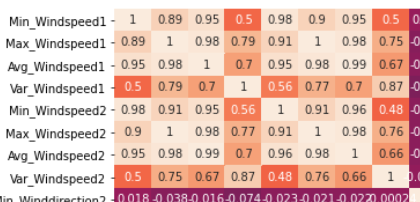

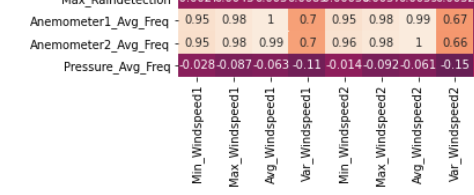
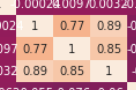
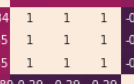
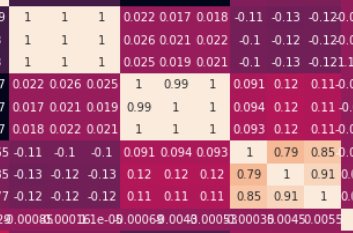
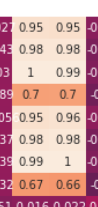

In [ ]:
## average between 1 and two sensors
columns_to_drop = ['Min_Windspeed1', 'Max_Windspeed1', 'Min_Windspeed2', 'Max_Windspeed2', 'Max_Pressure', 'Min_Pressure', 
                   'Min_AmbientTemp', 'Max_AmbientTemp', 'Min_Humidity', 'Max_Humidity', 'Min_Precipitation', 
                   'Max_Precipitation', 'Min_Winddirection2', 'Max_Winddirection2']
metmast_df_clean = metmast_df.copy()
metmast_df_clean = metmast_df_clean.drop(columns=columns_to_drop)

In [ ]:
temp = metmast_df_clean.loc[:,['Avg_Windspeed1', 'Avg_Windspeed2']]

In [ ]:
metmast_df_clean['Avg_Windspeed'] = temp.mean(axis=1)

In [ ]:
metmast_df_clean = metmast_df_clean.drop(columns=['Avg_Windspeed1', 'Avg_Windspeed2'])

In [ ]:
plt.figure(figsize=(20,10))
cor_met_clean = metmast_df_clean.corr()
sns.heatmap(cor_met_clean, annot=True)

In [ ]:
more_columns_to_drop = ['Anemometer1_Avg_Freq', 'Anemometer2_Avg_Freq', 'Pressure_Avg_Freq']
metmast_df_clean_1 = metmast_df_clean.copy()
metmast_df_clean_1 = metmast_df_clean_1.drop(columns=more_columns_to_drop)

In [ ]:
plt.figure(figsize=(20,10))
cor_met_clean = metmast_df_clean_1.corr()
sns.heatmap(cor_met_clean, annot=True)

In [ ]:
metmast_df_clean_1

In [ ]:
temp2 = metmast_df_clean_1.loc[:, ['Var_Windspeed1', 'Var_Windspeed2']]
metmast_df_clean_1['Var_Windspeed'] = temp2.mean(axis=1)
metmast_df_clean_1 = metmast_df_clean_1.drop(columns=['Var_Windspeed1', 'Var_Windspeed2'])

In [ ]:
plt.figure(figsize=(20,10))
cor_met_clean = metmast_df_clean_1.corr()
sns.heatmap(cor_met_clean, annot=True)

In [ ]:
metmast_df_clean_1 = metmast_df_clean_1.drop(columns='Avg_Windspeed')

In [ ]:
plt.figure(figsize=(20,10))
cor_met_clean = metmast_df_clean_1.corr()
sns.heatmap(cor_met_clean, annot=True)

### Signals Analysis

In [ ]:
signals_df.describe().transpose()

In [ ]:
# Remove columns with std <= 0.0001
std_0_threshold = 0.0001
signals_df = signals_df.drop(signals_df.std()[signals_df.std()<=std_0_threshold].index.values, axis=1)

In [ ]:
signals_df

In [ ]:
# Timestamp Column to datetime
signals_df['Timestamp'] = pd.to_datetime(signals_df['Timestamp'])

In [ ]:
## plots
for column in signals_df.columns:
    fig = plt.figure(figsize=(20,10))
    plt.plot(signals_df['Timestamp'], signals_df[column])
    plt.title(column)

In [ ]:
## Features correlation
plt.figure(figsize=(30,25))
cor_sign = signals_df.corr()
sns.heatmap(cor_sign, annot=True)
plt.show()

In [ ]:
signals_df

In [ ]:
signals_df.corr()

In [ ]:
cor_sign.shape[0]

In [ ]:
signals_df.columns

In [ ]:
first_columns_to_drop = ['Gen_RPM_Min', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Rtr_RPM_Min', 
                         'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'Grd_Prod_CurPhse1_Avg', 
                         'Grd_Prod_CurPhse2_Avg', 'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase2_Temp_Avg', 
                         'Amb_WindSpeed_Avg', ]

In [ ]:
signals_df_clean = signals_df.copy()
signals_df_clean = signals_df_clean.drop(columns=first_columns_to_drop)

In [ ]:
plt.figure(figsize=(30,25))
cor_sign = signals_df_clean.corr()
sns.heatmap(cor_sign, annot=True)
plt.show()

In [ ]:
signals_df_clean

### Variables Distribution

In [ ]:
metmast_df_clean_1.columns

In [ ]:
for column in metmast_df_clean_1.columns[1:]:
    sns.distplot(metmast_df_clean_1[column])
    plt.show()

In [ ]:
for column in signals_df_clean.columns[2:]:
    sns.distplot(signals_df_clean[column])
    plt.show()

In [ ]:
signals_df_clean.columns

## Analysing by Turbine

In [ ]:
failures_df['Turbine_ID'].value_counts()

In [ ]:
failures_df['Timestamp'] = pd.to_datetime(failures_df['Timestamp'])

In [ ]:
failures_06 = failures_df[failures_df['Turbine_ID'] == 'T06']

In [ ]:
failures_06

In [ ]:
logs_df[31850:31900]

In [ ]:
turbine_id = signals_df_clean[signals_df_clean['Turbine_ID'] == 'T06']

In [ ]:
turbine_id

In [ ]:
for column in turbine_id.columns[2:]:
    fig = plt.figure(figsize=(30,25))
    plt.plot(turbine_id['Timestamp'], turbine_id[column])
    plt.vlines(failures_06['Timestamp'], ymin=0, ymax= 1000, color='r')
    plt.title(column)

# Another Exploratory Analysis

In [3]:
failures_df = pd.read_csv(rooth_path + 'wind-farm-1-failures-training.csv')
locations_df = gpd.read_file(rooth_path + "wind-farm-1-locations.shp")
logs_df = pd.read_csv(rooth_path + 'wind-farm-1-logs-training.csv')
metmast_df = pd.read_csv(rooth_path + 'wind-farm-1-metmast-training.csv', sep=';')
signals_df = pd.read_csv(rooth_path + 'wind-farm-1-signals-training.csv', sep=';')
power_df = pd.read_csv(rooth_path + 'Power_curve.csv', sep=',')
costs_df = pd.read_csv(rooth_path + 'HTW_Costs.csv')

In [4]:
failures_df.shape, locations_df.shape, logs_df.shape, metmast_df.shape, signals_df.shape, power_df.shape, costs_df.shape

((23, 4), (17, 3), (256231, 5), (69961, 41), (434145, 83), (43, 2), (5, 4))

In [5]:
failures_df

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03T19:00:00+00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04T18:53:00+00:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30T12:40:00+00:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07T16:59:00+00:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10T03:46:00+00:00,High temperature transformer
5,T06,GENERATOR,2016-07-11T19:48:00+00:00,Generator replaced
6,T01,GEARBOX,2016-07-18T02:10:00+00:00,Gearbox pump damaged
7,T06,GENERATOR,2016-07-24T17:01:00+00:00,Generator temperature sensor failure
8,T09,GENERATOR_BEARING,2016-08-22T18:25:00+00:00,High temperature generator bearing
9,T07,TRANSFORMER,2016-08-23T02:21:00+00:00,High temperature transformer. Transformer refr...


In [6]:
locations_df.head()

,item,data_set_av,geometry
0,Wind Turbine 7,https://opendata.edp.com/explore/?sort=modifie...,POINT (0.00967 0.00182)
1,Wind Turbine 1,https://opendata.edp.com/explore/?sort=modifie...,POINT (0.00186 0.00324)
2,Wind Turbine 15,None,POINT (0.00268 -0.00772)
3,Wind Turbine 8,None,POINT (0.01073 -0.00355)
4,Wind Turbine 3,None,POINT (0.00152 -0.00170)


In [7]:
logs_df.head()

,TimeDetected,TimeReset,UnitTitle,Remark,UnitTitleDestination
0,2016-01-01T00:02:18+00:00,NaN,T11,External power ref.:2000kW,NaN
1,2016-01-01T00:07:15+00:00,NaN,T06,Generator 1 in,NaN
2,2016-01-01T00:11:33+00:00,NaN,T09,External power ref.:2000kW,NaN
3,2016-01-01T00:15:27+00:00,NaN,T01,Generator 1 in,NaN
4,2016-01-01T00:15:44+00:00,NaN,T01,External power ref.:2000kW,NaN


In [8]:
metmast_df.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01T00:00:00+00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,0,0.0499,0.24,1,0,0,600,98,99,418
1,2016-01-01T00:10:00+00:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,0,0.0499,0.24,1,0,0,600,99,101,418
2,2016-01-01T00:20:00+00:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,0,0.0499,0.24,1,0,0,600,111,113,418
3,2016-01-01T00:30:00+00:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,0,0.0499,0.24,1,0,0,600,122,125,418
4,2016-01-01T00:40:00+00:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,0,0.0499,0.24,1,0,0,600,121,123,417


In [9]:
signals_df

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T11,2016-01-01T00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
1,T06,2016-01-01T00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2,T01,2016-01-01T00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
3,T09,2016-01-01T00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
4,T07,2016-01-01T00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434140,T11,2017-09-01T00:00:00+00:00,1266.3,1234.3,1250.6,5.1,46.0,60,61,61,...,-864.5,-524.4,-1000.0,109.1,864.5,1000.0,524.4,109.1,43,96.8
434141,T09,2017-09-01T00:00:00+00:00,1268.4,1240.1,1251.9,6.0,44.0,62,61,62,...,-900.6,-340.3,-1000.0,121.6,900.6,1000.0,340.3,121.6,40,105.0
434142,T06,2017-09-01T00:00:00+00:00,1284.2,1233.4,1252.4,8.8,49.0,63,64,65,...,-725.4,-171.8,-1000.0,272.2,725.4,1000.0,171.8,272.2,45,84.1
434143,T01,2017-09-01T00:00:00+00:00,1299.0,1222.1,1255.3,12.4,45.0,64,64,64,...,-822.6,-314.2,-1000.0,203.6,822.6,1000.0,314.2,203.6,44,109.5


In [10]:
power_df.head()

,Wind speed (m/s),Power (kW)
0,4.0,89
1,4.5,142
2,5.0,204
3,5.5,279
4,6.0,368


In [11]:
costs_df.head()

,Component,Replacement_Cost,Repair_Cost,Inspection_cost
0,GEARBOX,100000,20000,5000
1,GENERATOR,60000,15000,5000
2,GENERATOR_BEARING,30000,12500,4500
3,TRANSFORMER,50000,3500,1500
4,HYDRAULIC_GROUP,20000,3000,2000


In [12]:
### pass all the Timestamps to date-time format
failures_df['Timestamp'] = pd.to_datetime(failures_df['Timestamp'])
logs_df['TimeDetected'] = pd.to_datetime(logs_df['TimeDetected'])
metmast_df['Timestamp'] = pd.to_datetime(metmast_df['Timestamp'])
signals_df['Timestamp'] = pd.to_datetime(signals_df['Timestamp'])

In [13]:
### Replace by integers Turbine_ID
failures_df.replace({'T01': 1, 'T06': 6, 'T07': 7, 'T09': 9, 'T11': 11}, inplace=True)
logs_df.replace({'T01': 1, 'T06': 6, 'T07': 7, 'T09': 9, 'T11': 11}, inplace=True)
signals_df.replace({'T01': 1, 'T06': 6, 'T07': 7, 'T09': 9, 'T11': 11}, inplace=True)
locations_df.replace({'Wind Turbine 1': 1, 'Wind Turbine 6': 6, 'Wind Turbine 7': 7, 
                      'Wind Turbine 9': 9, 'Wind Turbine 11': 11}, inplace=True)

# Analysing Types of Failures

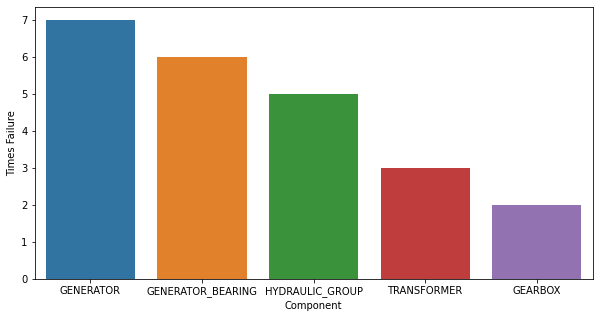

In [14]:
fig = plt.figure(figsize=(10,5))
nu = failures_df['Component'].value_counts().reset_index()
nu.columns = ['Component','Times Failure']
ax = sns.barplot(x='Component', y='Times Failure', data=nu)

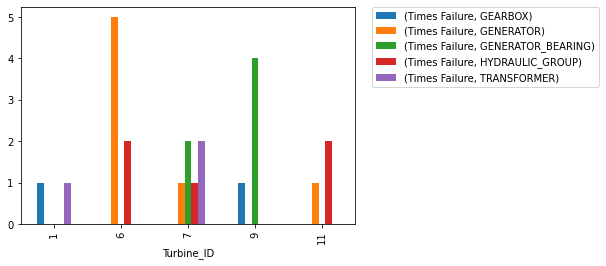

In [15]:
failures_df_by_turbine = failures_df.groupby(['Turbine_ID'])['Component'].value_counts()
failures_df_by_turbine = failures_df_by_turbine.to_frame()
failures_df_by_turbine.columns = ['Times Failure']
temp = failures_df_by_turbine.unstack()
temp.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [16]:
turbine_id_list = failures_df['Turbine_ID'].tolist()
component_id_list = failures_df['Component'].tolist()
timestamp_list = failures_df['Timestamp'].tolist()

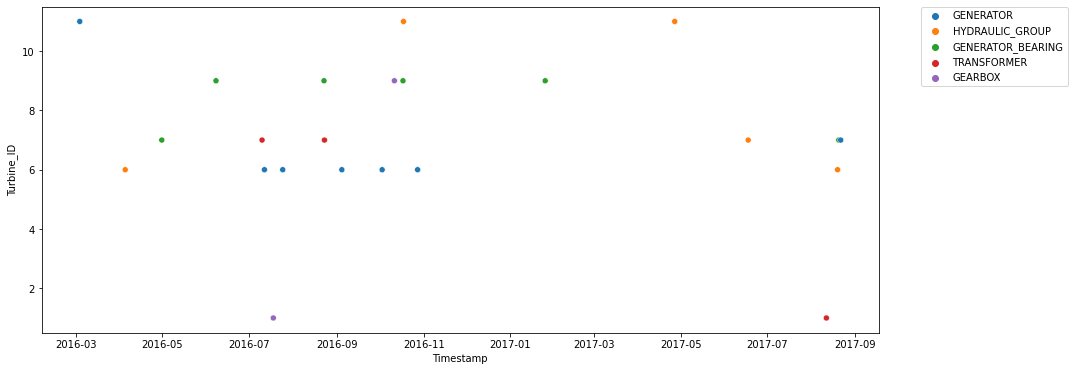

In [17]:
fig = plt.figure(figsize=(15,6))
sns.scatterplot(x=timestamp_list, y=turbine_id_list, hue=component_id_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Turbine_ID')
plt.xlabel('Timestamp')
plt.show()

#### We can see that the most failures are on the generator and generator bearings, with failures on Windmill 1, 6, 7 and 11

# Analysing Power DF

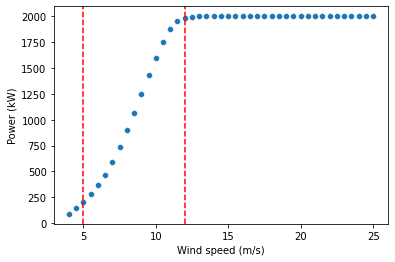

In [18]:
sns.scatterplot(x=power_df['Wind speed (m/s)'], y=power_df['Power (kW)'])
plt.axvline(x=5, color='red', linestyle= '--')
plt.axvline(x=12, color='red', linestyle= '--')

#### By Research:
• Region 1: Includes the time when the turbine is starting up;

• Region 2: Operational region in which it is desirable to seize as much wind power as possible;

• Region 3: Wind speeds are relatively high (rated wind speed) and force the turbine to limit the
fraction of wind power captured, for electrical and mechanical safety.

# First option by a Regression Approach - RUL

### Focusing on Metmast DF..

In [19]:
metmast_df.isnull().sum()

Timestamp                     0
Min_Windspeed1                1
Max_Windspeed1                0
Avg_Windspeed1                1
Var_Windspeed1                1
Min_Windspeed2                1
Max_Windspeed2                0
Avg_Windspeed2                1
Var_Windspeed2                1
Min_Winddirection2            1
Max_Winddirection2            0
Avg_Winddirection2            1
Var_Winddirection2            3
Min_AmbientTemp               1
Max_AmbientTemp               0
Avg_AmbientTemp               1
Min_Pressure                  1
Max_Pressure                  0
Avg_Pressure                  1
Min_Humidity                  1
Max_Humidity                  0
Avg_Humidity                  1
Min_Precipitation             0
Max_Precipitation             0
Avg_Precipitation             0
Min_Raindetection             0
Max_Raindetection             0
Avg_Raindetection             0
Anemometer1_Freq              0
Anemometer1_Offset            0
Anemometer1_CorrGain          0
Anemomet

In [20]:
metmast_df.describe().transpose()

## We can drop features with null variance - Min_Raindetection, Avg_Raindetection, Anemometer1_CorrGain, Anemometer1_CorrOffset
#Anemometer2_CorrGain, Anemometer2_CorrOffset, DistanceAirPress, AirRessureSensorZeroOffset
## For the features with small variance we can plot to see - Anemometer1_Offset, Anemometer2_Freq, Anemometer2_Offset

,count,mean,std,min,25%,50%,75%,max
Min_Windspeed1,69960.0,4.245343,2.654873e+00,0.0000,2.3000,3.7000,5.8000,17.8000
Max_Windspeed1,69961.0,8.413618,4.808946e+00,0.0000,4.7000,7.5000,11.3000,30.8000
Avg_Windspeed1,69960.0,6.338668,3.733035e+00,0.0000,3.5000,5.6000,8.5000,23.1000
Var_Windspeed1,69960.0,0.926280,1.213568e+00,0.0000,0.1500,0.4800,1.1900,35.1000
Min_Windspeed2,69960.0,4.341732,2.796495e+00,0.0000,2.2000,3.8000,6.0000,17.3000
Max_Windspeed2,69961.0,8.317262,4.693258e+00,0.0000,4.7000,7.5000,11.2000,29.0000
Avg_Windspeed2,69960.0,6.338642,3.740070e+00,0.0000,3.5000,5.6000,8.6000,22.9000
Var_Windspeed2,69960.0,0.807165,9.985055e-01,0.0000,0.1500,0.4700,1.0600,35.9300
Min_Winddirection2,69960.0,232.267953,2.458751e+01,0.0000,236.0000,236.0000,236.0000,358.0000
Max_Winddirection2,69961.0,233.634939,1.868413e+01,0.0000,236.0000,236.0000,236.0000,357.0000


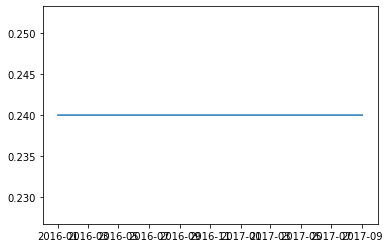

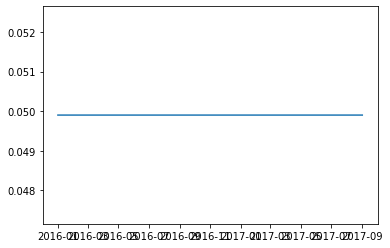

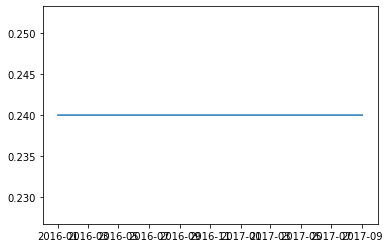

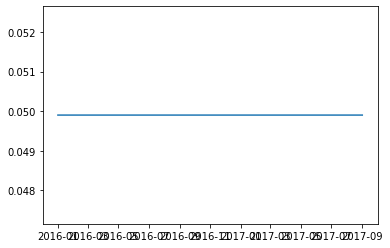

In [21]:
## See if we can also drop 
columns = ['Anemometer1_Offset', 'Anemometer2_Freq', 'Anemometer2_Offset', 'Anemometer1_Freq']
for col in columns:
    plt.plot(metmast_df['Timestamp'], metmast_df[col])
    plt.show()

## Also Drop these columns

In [22]:
drop_features_metmast = ['Anemometer1_Offset', 'Anemometer2_Freq', 'Anemometer2_Offset', 'Min_Raindetection',
                         'Avg_Raindetection', 'Anemometer1_CorrGain', 'Anemometer1_CorrOffset',
                         'Anemometer2_CorrGain', 'Anemometer2_CorrOffset', 'DistanceAirPress', 'AirRessureSensorZeroOffset']
metmast_df = metmast_df.drop(columns=drop_features_metmast)

In [23]:
metmast_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Min_Windspeed1,69960.0,4.245343,2.654873e+00,0.0000,2.3000,3.7000,5.8000,17.8000
Max_Windspeed1,69961.0,8.413618,4.808946e+00,0.0000,4.7000,7.5000,11.3000,30.8000
Avg_Windspeed1,69960.0,6.338668,3.733035e+00,0.0000,3.5000,5.6000,8.5000,23.1000
Var_Windspeed1,69960.0,0.926280,1.213568e+00,0.0000,0.1500,0.4800,1.1900,35.1000
Min_Windspeed2,69960.0,4.341732,2.796495e+00,0.0000,2.2000,3.8000,6.0000,17.3000
Max_Windspeed2,69961.0,8.317262,4.693258e+00,0.0000,4.7000,7.5000,11.2000,29.0000
Avg_Windspeed2,69960.0,6.338642,3.740070e+00,0.0000,3.5000,5.6000,8.6000,22.9000
Var_Windspeed2,69960.0,0.807165,9.985055e-01,0.0000,0.1500,0.4700,1.0600,35.9300
Min_Winddirection2,69960.0,232.267953,2.458751e+01,0.0000,236.0000,236.0000,236.0000,358.0000
Max_Winddirection2,69961.0,233.634939,1.868413e+01,0.0000,236.0000,236.0000,236.0000,357.0000


In [24]:
### Grouping Time Stamps of 0,5h, 1h, 3h, 8h, 12h and 24h, 2D and 30D
### Anothers if we want
### Can Try max, mean, median..
metmast_df_h = metmast_df.resample('30T', on='Timestamp').max()
metmast_df_1h = metmast_df.resample('H', on='Timestamp').max()
metmast_df_3h = metmast_df.resample('3H', on='Timestamp').max()
metmast_df_8h = metmast_df.resample('8H', on='Timestamp').max()
metmast_df_12h = metmast_df.resample('12H', on='Timestamp').max()
metmast_df_24h = metmast_df.resample('24H', on='Timestamp').max()
metmast_df_2d = metmast_df.resample('2D', on='Timestamp').max()
metmast_df_30d = metmast_df.resample('30D', on='Timestamp').max()

In [25]:
metmast_df_24h

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Max_Humidity,Avg_Humidity,Min_Precipitation,Max_Precipitation,Avg_Precipitation,Max_Raindetection,Anemometer1_Freq,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,2016-01-01 23:50:00+00:00,6.6,11.3,8.8,1.33,6.5,10.9,8.9,1.32,236.0,...,96.0,95.0,0.0,0.0,0.0,0.0,0.0499,174.0,175.0,418.0
2016-01-02 00:00:00+00:00,2016-01-02 23:50:00+00:00,7.9,14.0,10.8,2.37,7.8,14.2,10.8,2.36,236.0,...,97.0,97.0,3.6,21.6,19.2,0.0,0.0499,213.0,214.0,418.0
2016-01-03 00:00:00+00:00,2016-01-03 23:50:00+00:00,7.8,17.8,12.4,5.79,7.6,18.0,12.4,5.86,236.0,...,98.0,98.0,1.2,2.4,2.1,0.0,0.0499,245.0,245.0,416.0
2016-01-04 00:00:00+00:00,2016-01-04 23:50:00+00:00,9.3,18.0,14.2,6.38,9.2,18.3,14.3,6.25,236.0,...,98.0,97.0,1.2,7.2,6.3,0.0,0.0499,282.0,283.0,413.0
2016-01-05 00:00:00+00:00,2016-01-05 23:50:00+00:00,11.2,23.8,17.1,7.17,11.1,24.0,17.1,7.42,236.0,...,98.0,98.0,10.8,15.6,14.7,0.0,0.0499,339.0,339.0,413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-28 00:00:00+00:00,2017-08-28 23:50:00+00:00,5.9,10.4,7.8,1.43,6.2,10.4,7.9,1.43,358.0,...,88.0,88.0,0.0,0.0,0.0,0.0,0.0499,152.0,154.0,408.0
2017-08-29 00:00:00+00:00,2017-08-29 23:50:00+00:00,5.8,12.4,8.2,2.22,6.1,12.2,8.2,2.65,341.0,...,96.0,96.0,38.4,39.6,39.5,0.0,0.0499,160.0,160.0,408.0
2017-08-30 00:00:00+00:00,2017-08-30 23:50:00+00:00,5.2,10.5,7.8,1.82,5.1,9.3,7.1,1.67,358.0,...,91.0,90.0,0.0,0.0,0.0,0.0,0.0499,153.0,140.0,408.0


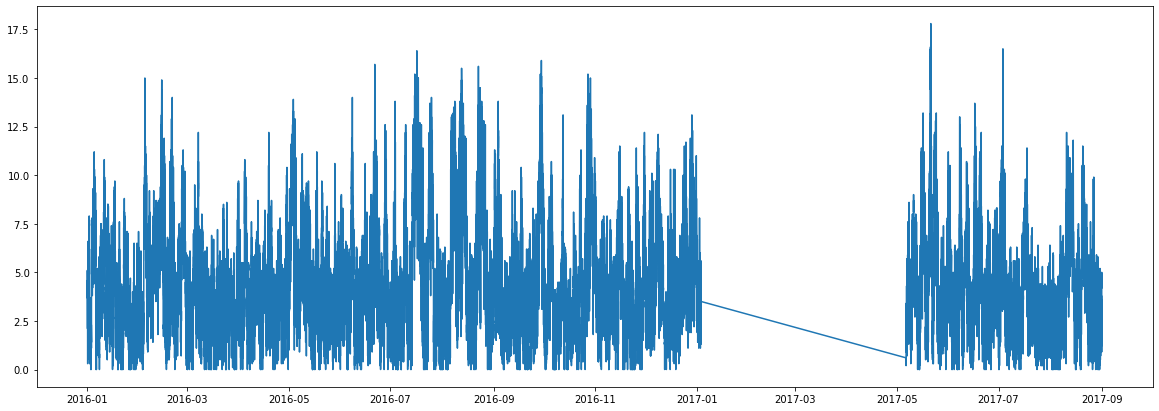

In [26]:
fig = plt.figure(figsize=(20,7))
plt.plot(metmast_df['Timestamp'], metmast_df['Min_Windspeed1'])
### We can see there is a gret gap between 2017-01 and 2017-05

### We can see there is a gret gap between 2017-01 and 2017-05

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


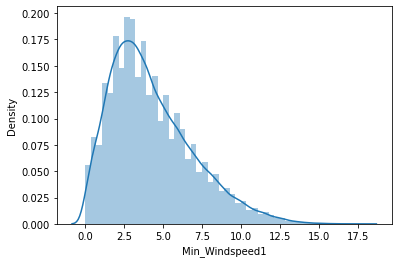

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


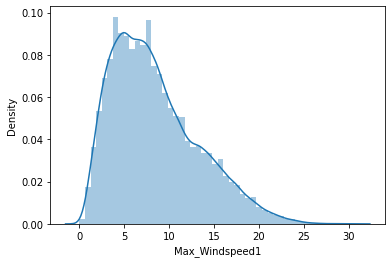

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


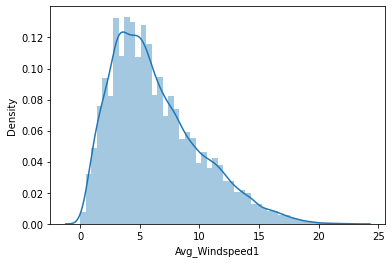

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


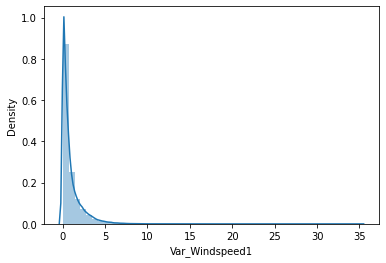

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


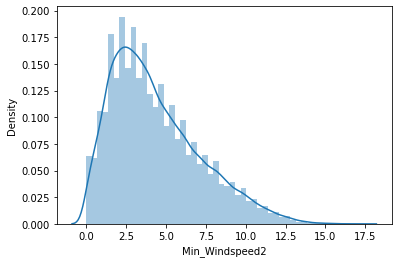

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


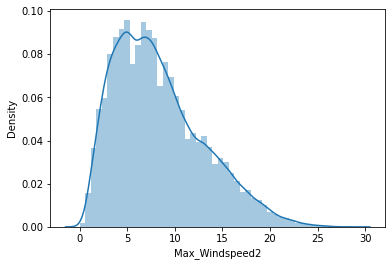

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


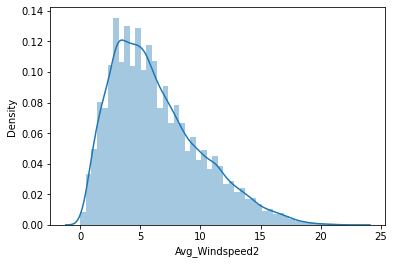

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


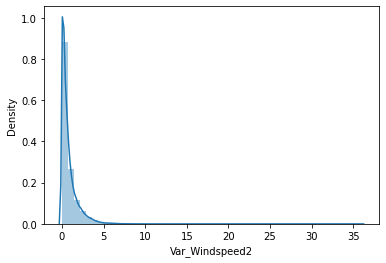

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


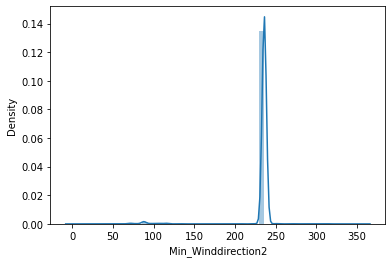

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


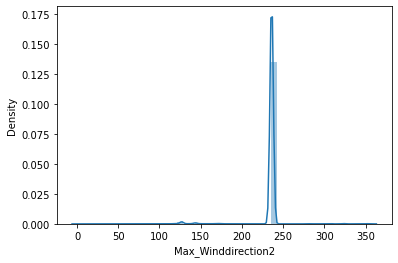

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


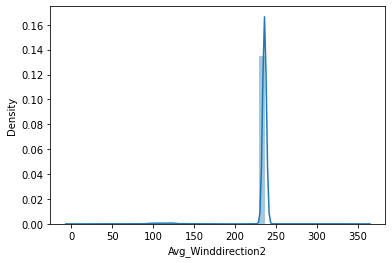

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


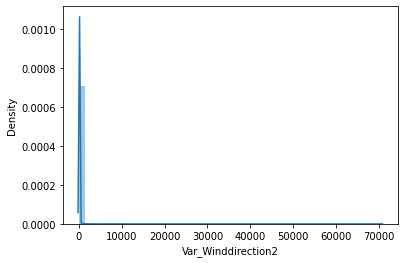

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


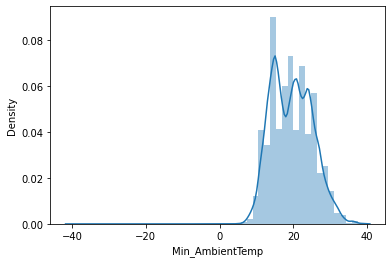

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


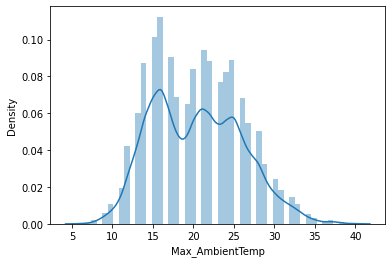

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


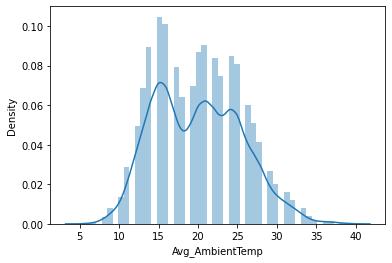

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


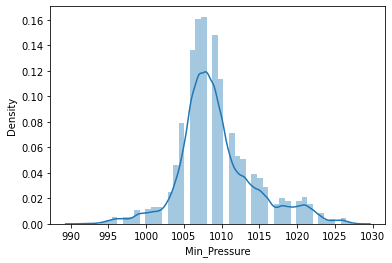

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


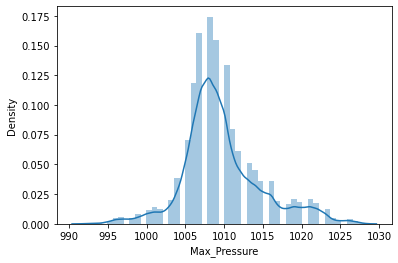

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


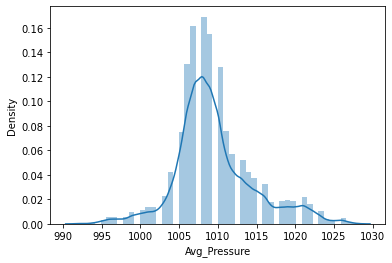

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


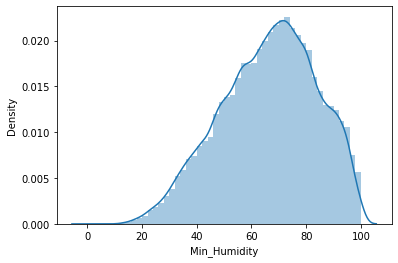

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


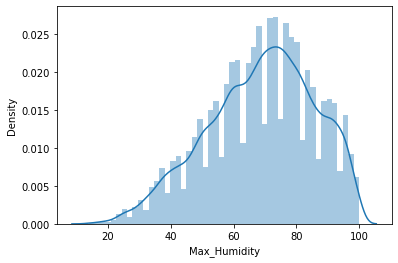

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


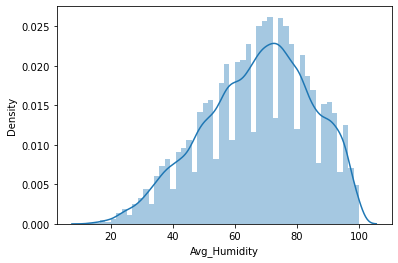

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


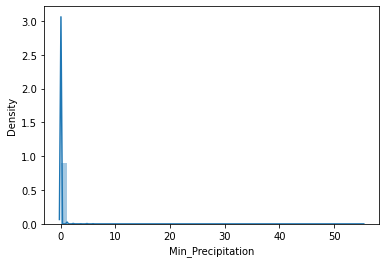

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


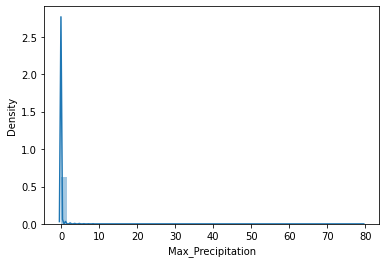

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


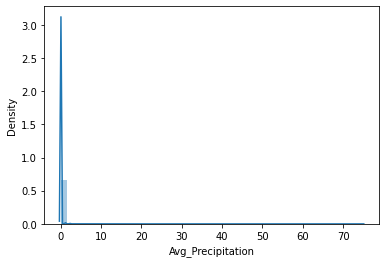

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


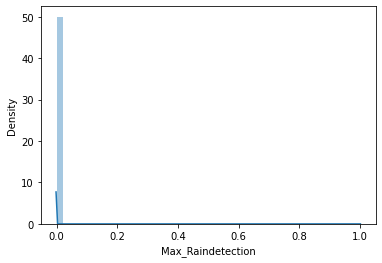

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


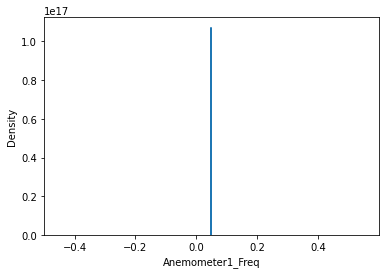

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


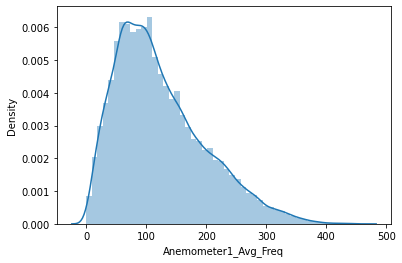

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


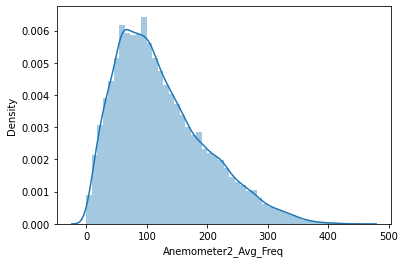

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


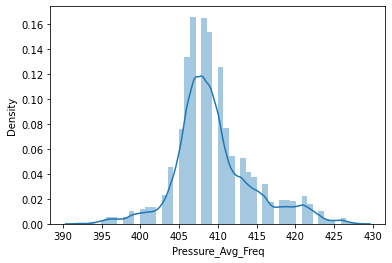

In [27]:
## Plot Distributions of variables
for column in metmast_df.columns[1:]:
    sns.distplot(metmast_df[column])
    plt.show()

### Focusing on Signals DF..

In [28]:
signals_df.isnull().sum()

Turbine_ID               0
Timestamp                0
Gen_RPM_Max              0
Gen_RPM_Min              0
Gen_RPM_Avg              0
                        ..
Grd_Prod_PsbleCap_Max    0
Grd_Prod_PsbleCap_Min    0
Grd_Prod_PsbleCap_Std    0
Gen_Bear2_Temp_Avg       0
Nac_Direction_Avg        0
Length: 83, dtype: int64

In [29]:
# See distribution of variables with the interval of time of the dataset
signals_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Turbine_ID,434145.0,6.804305,3.376855,1.0,6.0,7.0,9.0,11.0
Gen_RPM_Max,434145.0,1180.310084,642.006443,0.0,303.7,1421.1,1681.9,2040.9
Gen_RPM_Min,434145.0,923.317963,614.935372,0.0,183.9,1231.3,1369.4,1672.0
Gen_RPM_Avg,434145.0,1055.186079,617.817715,0.0,261.4,1276.8,1592.3,1684.4
Gen_RPM_Std,434145.0,68.819458,112.115169,0.0,14.0,28.5,70.8,823.2
...,...,...,...,...,...,...,...,...
Grd_Prod_PsbleCap_Max,434145.0,662.075995,438.854230,0.0,0.0,1000.0,1000.0,1000.0
Grd_Prod_PsbleCap_Min,434145.0,320.132837,354.557765,-200.0,0.0,249.3,495.2,1000.0
Grd_Prod_PsbleCap_Std,434145.0,82.694327,100.024771,0.0,0.0,32.4,155.0,500.0
Gen_Bear2_Temp_Avg,434145.0,43.381573,14.201787,13.0,33.0,41.0,53.0,205.0


In [30]:
drop_features_signals = ['Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_ReactPwrGen2']
signals_df = signals_df.drop(columns=drop_features_signals)

In [31]:
### Grouping Time Stamps of 0,5h, 1h, 3h, 8h, 12h and 24h, 2D and 30D
### Anothers if we want
### Can Try max, mean, median..
signals_df_h = signals_df.resample('30T', on='Timestamp').max()
signals_df_1h = signals_df.resample('H', on='Timestamp').max()
signals_df_3h = signals_df.resample('3H', on='Timestamp').max()
signals_df_8h = signals_df.resample('8H', on='Timestamp').max()
signals_df_12h = signals_df.resample('12H', on='Timestamp').max()
signals_df_24h = signals_df.resample('24H', on='Timestamp').max()
signals_df_2d = signals_df.resample('2D', on='Timestamp').max()
signals_df_30d = signals_df.resample('30D', on='Timestamp').max()

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


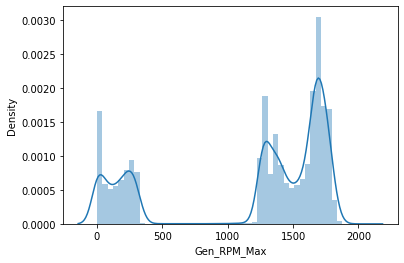

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


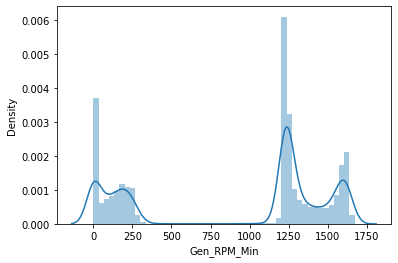

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


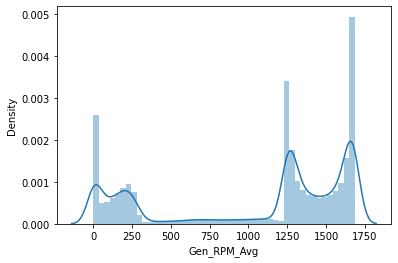

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


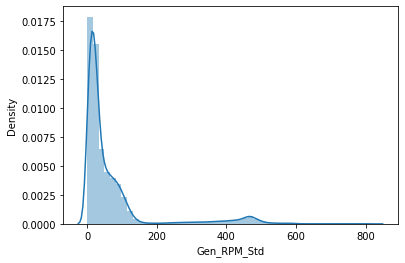

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


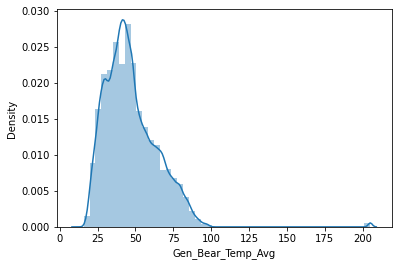

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


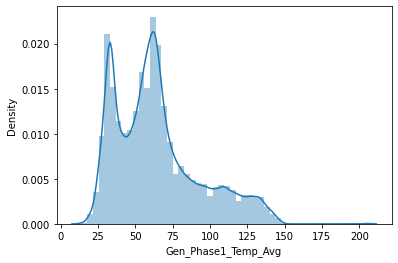

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


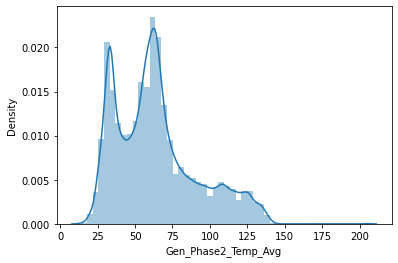

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


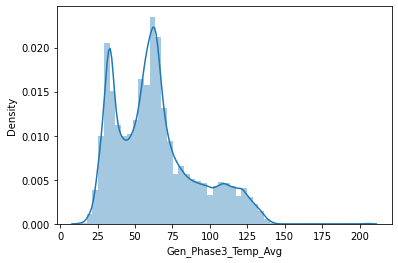

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


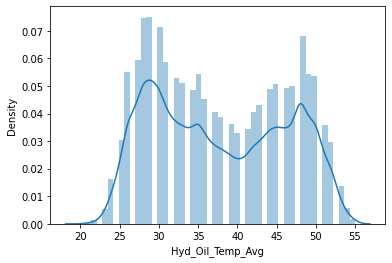

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


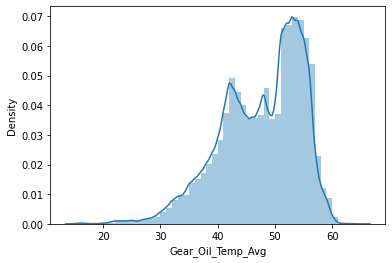

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


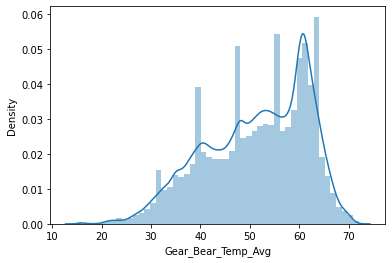

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


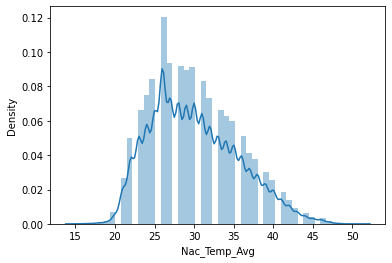

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


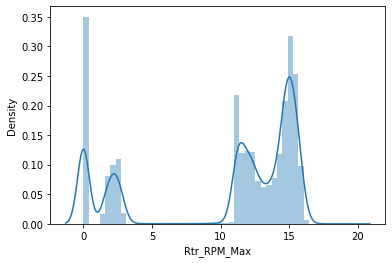

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


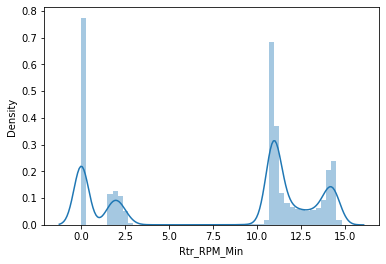

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


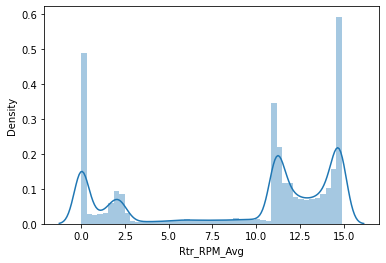

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


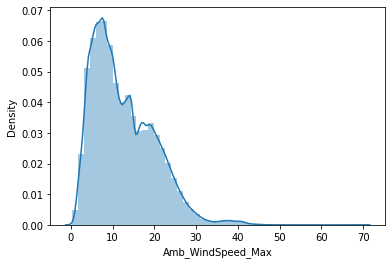

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


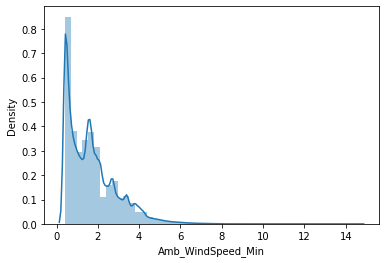

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


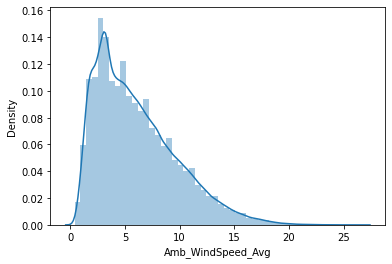

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


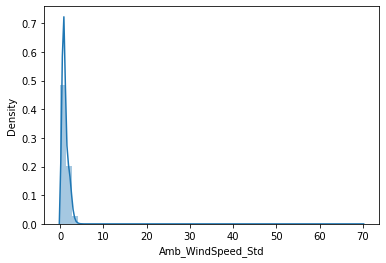

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


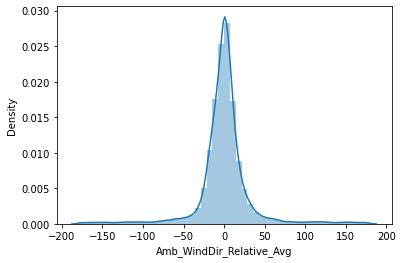

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


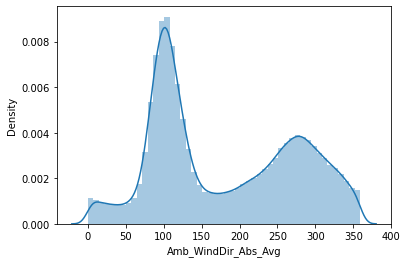

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


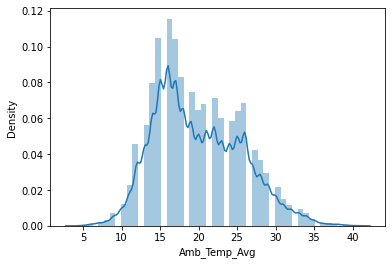

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


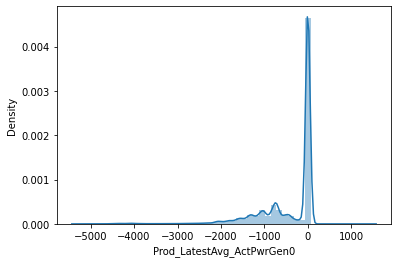

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


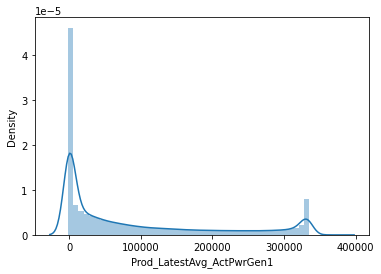

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


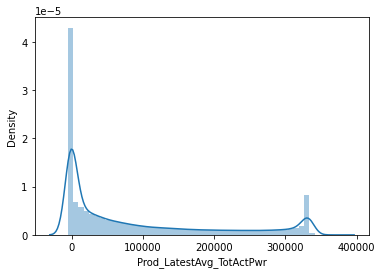

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


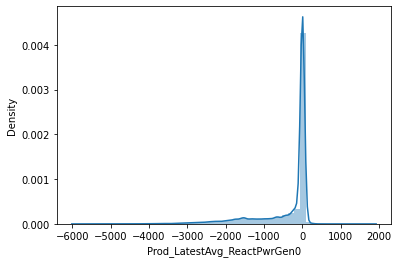

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


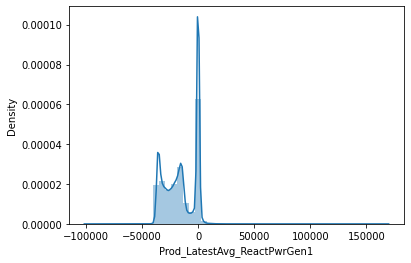

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


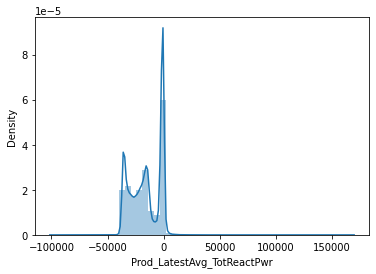

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


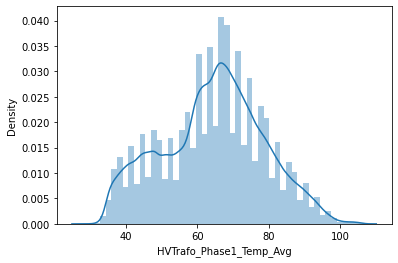

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


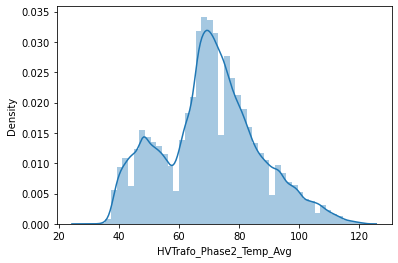

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


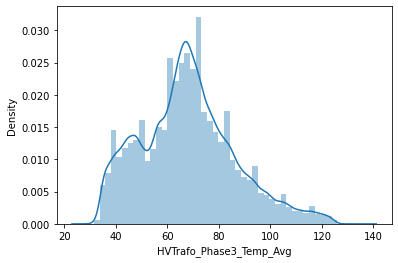

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


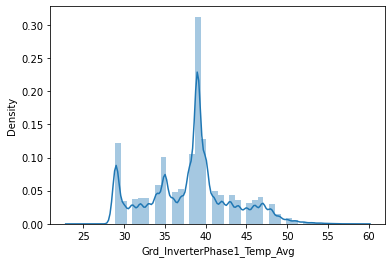

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


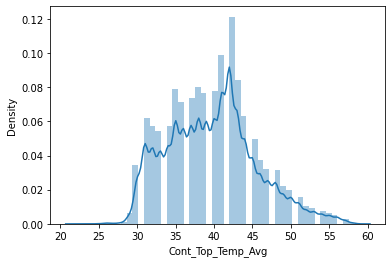

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


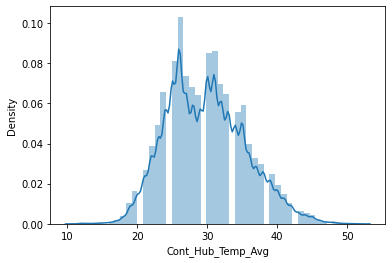

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


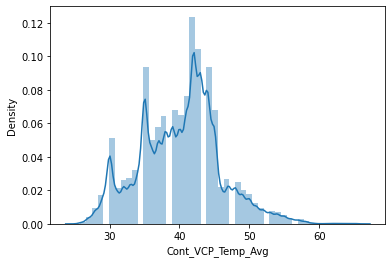

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


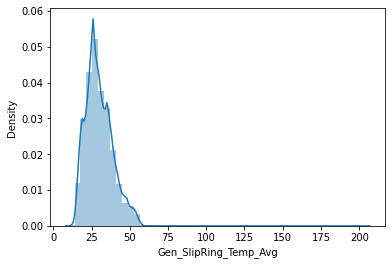

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


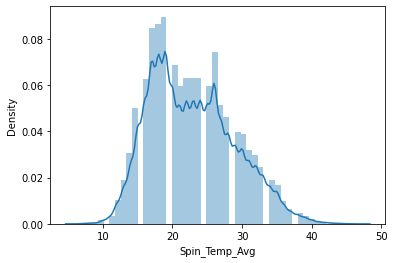

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


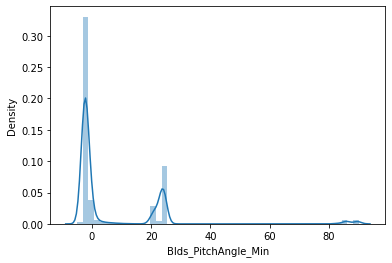

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


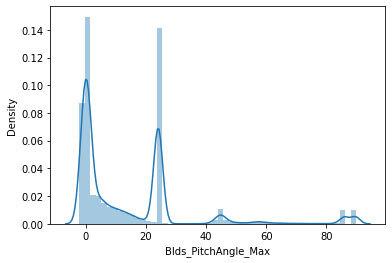

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


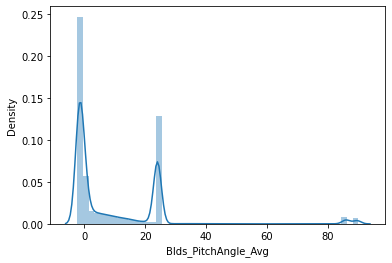

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


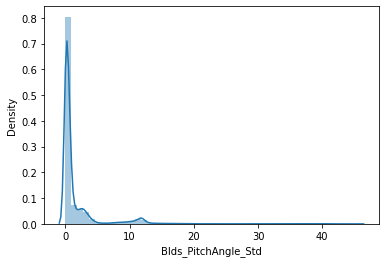

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


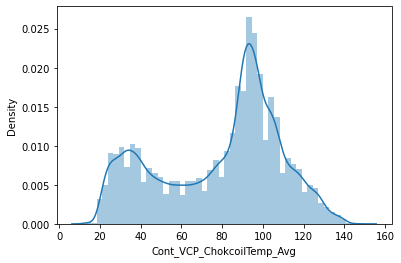

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


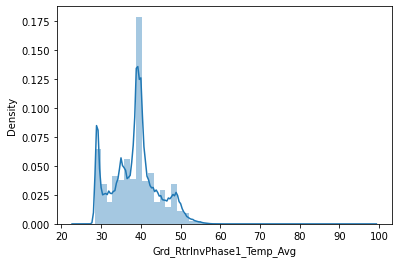

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


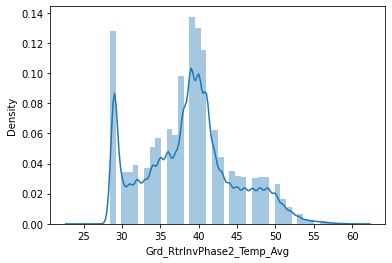

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


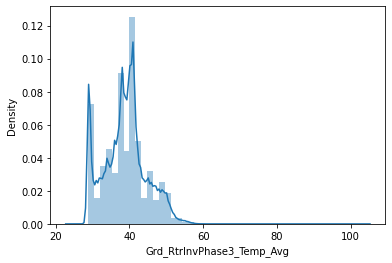

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


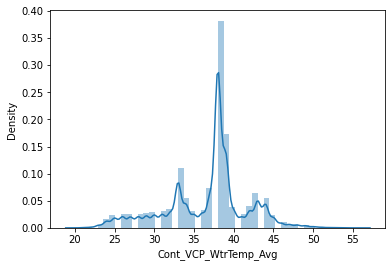

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


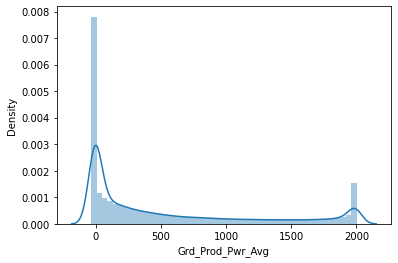

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


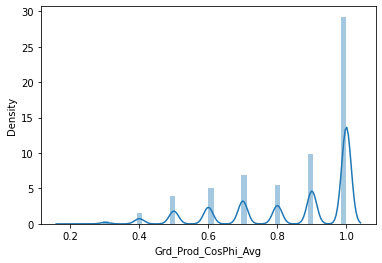

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


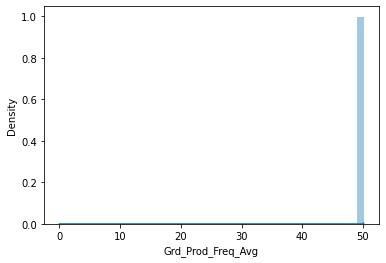

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


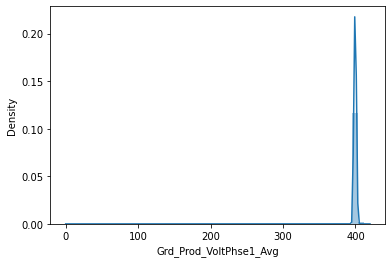

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


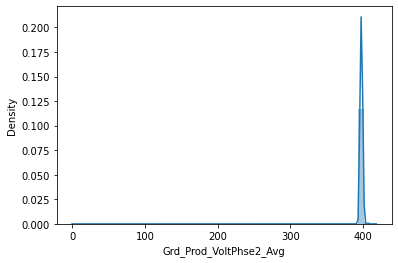

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


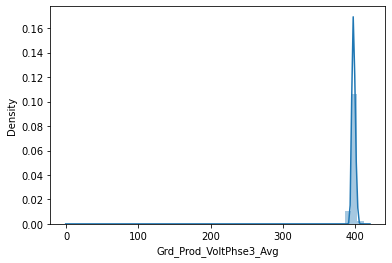

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


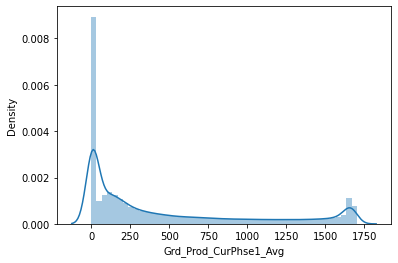

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


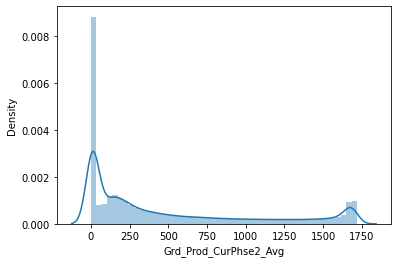

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


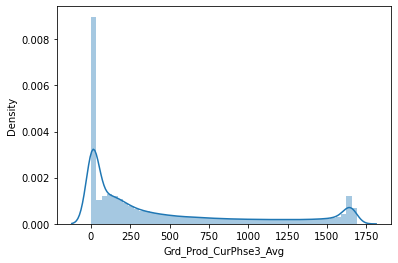

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


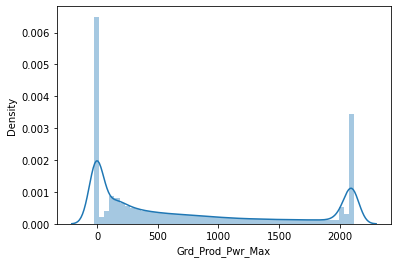

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


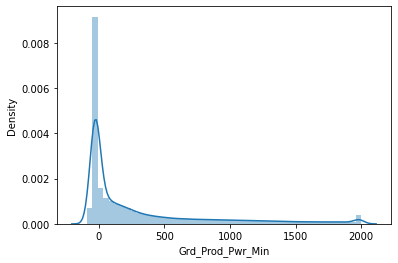

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


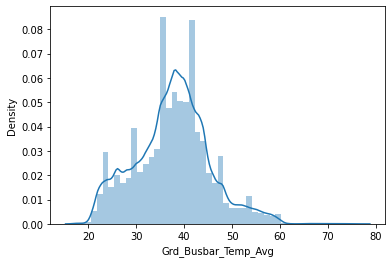

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


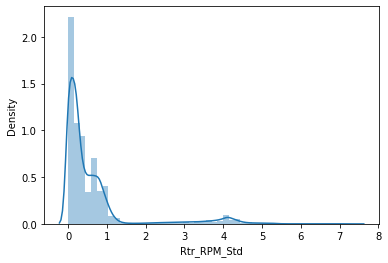

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


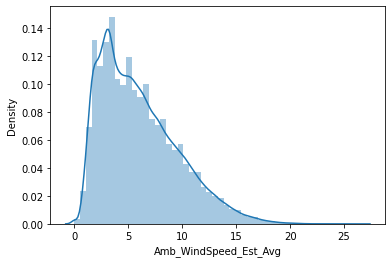

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


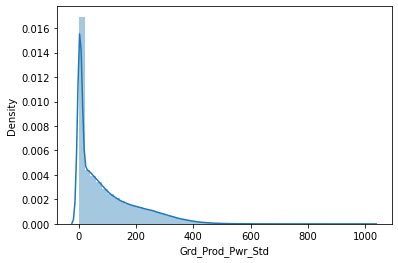

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


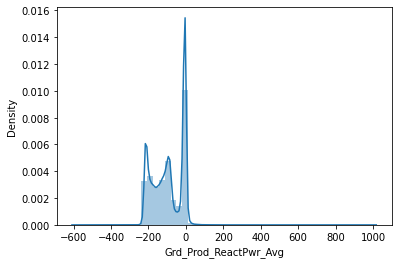

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


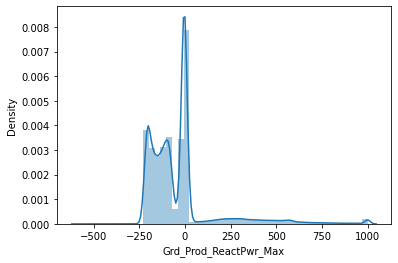

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


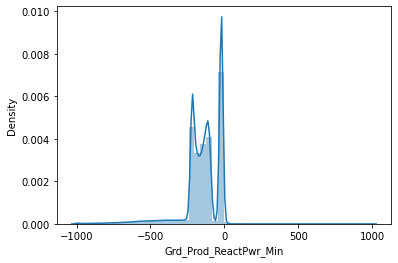

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


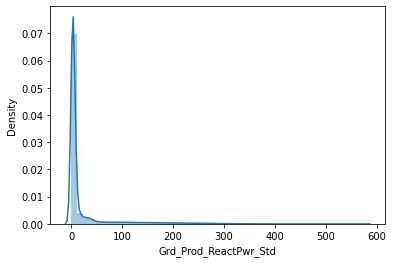

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


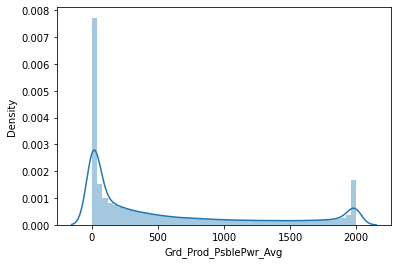

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


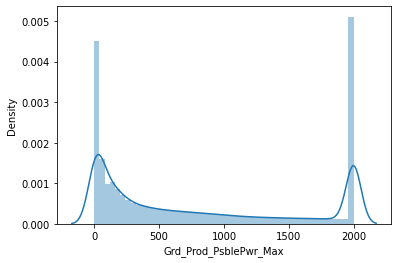

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


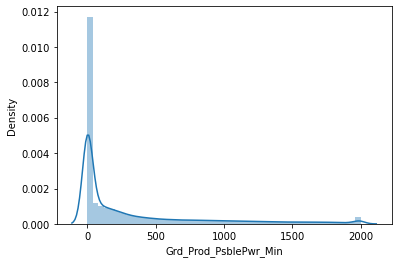

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


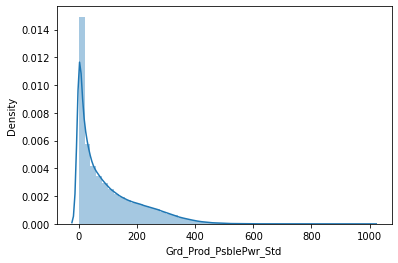

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


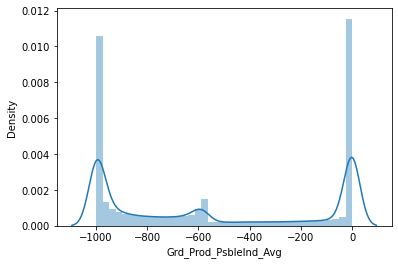

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


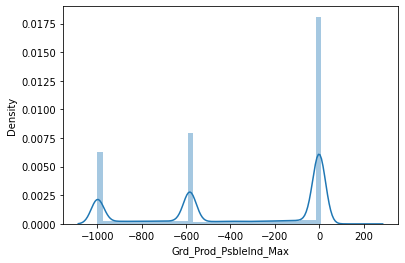

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


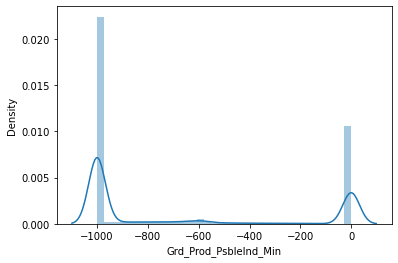

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


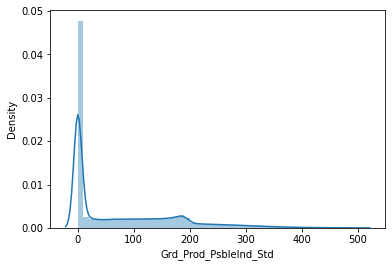

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


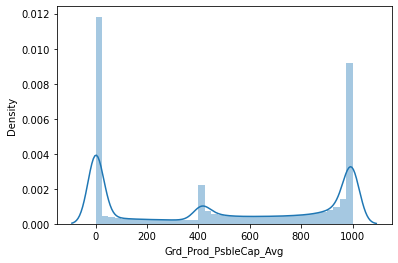

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


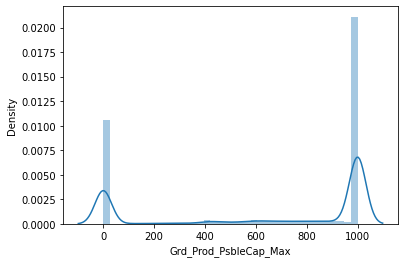

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


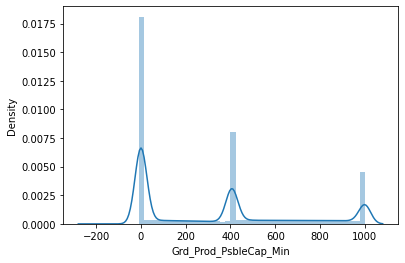

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


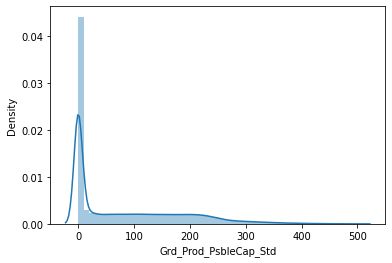

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


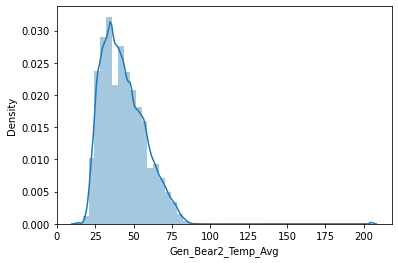

/home/guilherme/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


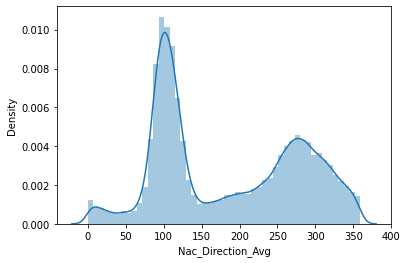

In [32]:
### Plot distribution of variables
for column in signals_df.columns[2:]:
    sns.distplot(signals_df[column])
    plt.show()

#### Features Distribution are not normal

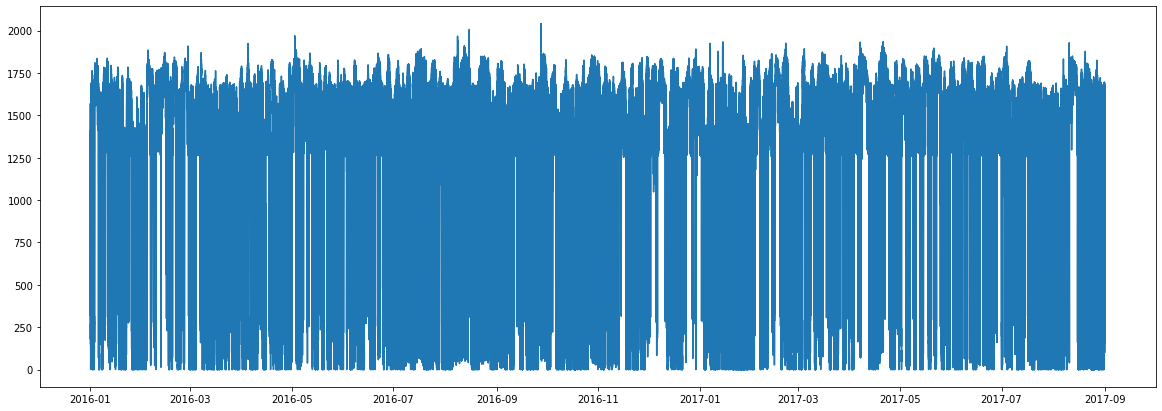

In [33]:
fig = plt.figure(figsize=(20,7))
plt.plot(signals_df['Timestamp'], signals_df['Gen_RPM_Max'])
### There is no gap in this time intervals

## We will not do feature selection for now, unitl we have the target variable

## Predictive maintenance can be formulated in one of the two ways:

- Classification approach - predicts whether there is a possibility of failure in next n-steps.
- Regression approach - predicts how much time is left before the next failure. We call this Remaining Useful Life (RUL).

# First option by a Classification Approach

In [34]:
# We have 5 components of 5 windturbines that we need to predict that will fail

In [35]:
failures_df

,Turbine_ID,Component,Timestamp,Remarks
0,11,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator
1,6,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation
2,7,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...
3,9,GENERATOR_BEARING,2016-06-07 16:59:00+00:00,High tempemperature generator bearing
4,7,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer
5,6,GENERATOR,2016-07-11 19:48:00+00:00,Generator replaced
6,1,GEARBOX,2016-07-18 02:10:00+00:00,Gearbox pump damaged
7,6,GENERATOR,2016-07-24 17:01:00+00:00,Generator temperature sensor failure
8,9,GENERATOR_BEARING,2016-08-22 18:25:00+00:00,High temperature generator bearing
9,7,TRANSFORMER,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...


In [36]:
signals_df

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
1,6,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2,1,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
3,9,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
4,7,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434140,11,2017-09-01 00:00:00+00:00,1266.3,1234.3,1250.6,5.1,46.0,60,61,61,...,-864.5,-524.4,-1000.0,109.1,864.5,1000.0,524.4,109.1,43,96.8
434141,9,2017-09-01 00:00:00+00:00,1268.4,1240.1,1251.9,6.0,44.0,62,61,62,...,-900.6,-340.3,-1000.0,121.6,900.6,1000.0,340.3,121.6,40,105.0
434142,6,2017-09-01 00:00:00+00:00,1284.2,1233.4,1252.4,8.8,49.0,63,64,65,...,-725.4,-171.8,-1000.0,272.2,725.4,1000.0,171.8,272.2,45,84.1
434143,1,2017-09-01 00:00:00+00:00,1299.0,1222.1,1255.3,12.4,45.0,64,64,64,...,-822.6,-314.2,-1000.0,203.6,822.6,1000.0,314.2,203.6,44,109.5


In [37]:
failures_df

,Turbine_ID,Component,Timestamp,Remarks
0,11,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator
1,6,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation
2,7,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...
3,9,GENERATOR_BEARING,2016-06-07 16:59:00+00:00,High tempemperature generator bearing
4,7,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer
5,6,GENERATOR,2016-07-11 19:48:00+00:00,Generator replaced
6,1,GEARBOX,2016-07-18 02:10:00+00:00,Gearbox pump damaged
7,6,GENERATOR,2016-07-24 17:01:00+00:00,Generator temperature sensor failure
8,9,GENERATOR_BEARING,2016-08-22 18:25:00+00:00,High temperature generator bearing
9,7,TRANSFORMER,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...


In [38]:
failures_df.dtypes

Turbine_ID                  int64
Component                  object
Timestamp     datetime64[ns, UTC]
Remarks                    object
dtype: object

In [39]:
## Create Dummie Variables
failures_df = pd.get_dummies(failures_df, columns=["Component"])

In [40]:
## Tables Merge
failures_df

,Turbine_ID,Timestamp,Remarks,Component_GEARBOX,Component_GENERATOR,Component_GENERATOR_BEARING,Component_HYDRAULIC_GROUP,Component_TRANSFORMER
0,11,2016-03-03 19:00:00+00:00,Electric circuit error in generator,0,1,0,0,0
1,6,2016-04-04 18:53:00+00:00,Error in pitch regulation,0,0,0,1,0
2,7,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...,0,0,1,0,0
3,9,2016-06-07 16:59:00+00:00,High tempemperature generator bearing,0,0,1,0,0
4,7,2016-07-10 03:46:00+00:00,High temperature transformer,0,0,0,0,1
5,6,2016-07-11 19:48:00+00:00,Generator replaced,0,1,0,0,0
6,1,2016-07-18 02:10:00+00:00,Gearbox pump damaged,1,0,0,0,0
7,6,2016-07-24 17:01:00+00:00,Generator temperature sensor failure,0,1,0,0,0
8,9,2016-08-22 18:25:00+00:00,High temperature generator bearing,0,0,1,0,0
9,7,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...,0,0,0,0,1


In [41]:
signals_df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
1,6,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2,1,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
3,9,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
4,7,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3


In [42]:
metmast_df.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Max_Humidity,Avg_Humidity,Min_Precipitation,Max_Precipitation,Avg_Precipitation,Max_Raindetection,Anemometer1_Freq,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01 00:00:00+00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,92,90.0,0.0,0.0,0.0,0,0.0499,98,99,418
1,2016-01-01 00:10:00+00:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,90,87.0,0.0,0.0,0.0,0,0.0499,99,101,418
2,2016-01-01 00:20:00+00:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,91,90.0,0.0,0.0,0.0,0,0.0499,111,113,418
3,2016-01-01 00:30:00+00:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,90,90.0,0.0,0.0,0.0,0,0.0499,122,125,418
4,2016-01-01 00:40:00+00:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,91,90.0,0.0,0.0,0.0,0,0.0499,121,123,417


## We are missing a 3 months period on 2017
Work only with 2016 year

In [43]:
failures_df_2016 = failures_df.loc[failures_df['Timestamp'] < '2017']
metmast_df_2016 = metmast_df.loc[metmast_df['Timestamp'] < '2017']
signals_df_2016 = signals_df.loc[signals_df['Timestamp'] < '2017']


In [44]:
merge_signals_metmast = pd.merge_asof(signals_df_2016, metmast_df_2016, on='Timestamp')

In [45]:
merge_signals_metmast

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Max_Humidity,Avg_Humidity,Min_Precipitation,Max_Precipitation,Avg_Precipitation,Max_Raindetection,Anemometer1_Freq,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,92,90.0,0.0,0.0,0.0,0,0.0499,98,99,418
1,6,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,92,90.0,0.0,0.0,0.0,0,0.0499,98,99,418
2,1,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,92,90.0,0.0,0.0,0.0,0,0.0499,98,99,418
3,9,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,92,90.0,0.0,0.0,0.0,0,0.0499,98,99,418
4,7,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,92,90.0,0.0,0.0,0.0,0,0.0499,98,99,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260273,7,2016-12-31 23:50:00+00:00,1402.0,1243.1,1288.6,30.8,36.0,58,58,57,...,67,67.0,0.0,0.0,0.0,0,0.0499,141,127,420
260274,9,2016-12-31 23:50:00+00:00,1657.1,1319.1,1452.8,89.6,39.0,59,58,60,...,67,67.0,0.0,0.0,0.0,0,0.0499,141,127,420
260275,6,2016-12-31 23:50:00+00:00,1325.6,1234.5,1268.3,20.3,39.0,54,55,55,...,67,67.0,0.0,0.0,0.0,0,0.0499,141,127,420
260276,11,2016-12-31 23:50:00+00:00,1676.9,1411.1,1625.1,51.6,41.0,61,62,62,...,67,67.0,0.0,0.0,0.0,0,0.0499,141,127,420


In [46]:
failures_df_2016

,Turbine_ID,Timestamp,Remarks,Component_GEARBOX,Component_GENERATOR,Component_GENERATOR_BEARING,Component_HYDRAULIC_GROUP,Component_TRANSFORMER
0,11,2016-03-03 19:00:00+00:00,Electric circuit error in generator,0,1,0,0,0
1,6,2016-04-04 18:53:00+00:00,Error in pitch regulation,0,0,0,1,0
2,7,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...,0,0,1,0,0
3,9,2016-06-07 16:59:00+00:00,High tempemperature generator bearing,0,0,1,0,0
4,7,2016-07-10 03:46:00+00:00,High temperature transformer,0,0,0,0,1
5,6,2016-07-11 19:48:00+00:00,Generator replaced,0,1,0,0,0
6,1,2016-07-18 02:10:00+00:00,Gearbox pump damaged,1,0,0,0,0
7,6,2016-07-24 17:01:00+00:00,Generator temperature sensor failure,0,1,0,0,0
8,9,2016-08-22 18:25:00+00:00,High temperature generator bearing,0,0,1,0,0
9,7,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...,0,0,0,0,1


In [47]:
final_df = merge_signals_metmast.merge(failures_df_2016, on=['Timestamp', 'Turbine_ID'], how='outer')

In [48]:
final_df

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Anemometer1_Freq,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq,Remarks,Component_GEARBOX,Component_GENERATOR,Component_GENERATOR_BEARING,Component_HYDRAULIC_GROUP,Component_TRANSFORMER
0,11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59.0,61.0,60.0,...,0.0499,98.0,99.0,418.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51.0,52.0,53.0,...,0.0499,98.0,99.0,418.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,...,0.0499,98.0,99.0,418.0,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58.0,57.0,58.0,...,0.0499,98.0,99.0,418.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62.0,62.0,61.0,...,0.0499,98.0,99.0,418.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260287,6,2016-10-02 17:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Refrigeration system and temperature sensors i...,0.0,1.0,0.0,0.0,0.0
260288,9,2016-10-11 08:06:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Gearbox repaired,1.0,0.0,0.0,0.0,0.0
260289,9,2016-10-17 09:19:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Generator bearings replaced,0.0,0.0,1.0,0.0,0.0
260290,11,2016-10-17 17:44:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Hydraulic group error in the brake circuit,0.0,0.0,0.0,1.0,0.0


In [49]:
final_df['Component_GEARBOX'].fillna(0, inplace=True)
final_df['Component_GENERATOR'].fillna(0, inplace=True)
final_df['Component_GENERATOR_BEARING'].fillna(0, inplace=True)
final_df['Component_HYDRAULIC_GROUP'].fillna(0, inplace=True)
final_df['Component_TRANSFORMER'].fillna(0, inplace=True)

In [50]:
final_df

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Anemometer1_Freq,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq,Remarks,Component_GEARBOX,Component_GENERATOR,Component_GENERATOR_BEARING,Component_HYDRAULIC_GROUP,Component_TRANSFORMER
0,11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59.0,61.0,60.0,...,0.0499,98.0,99.0,418.0,NaN,0.0,0.0,0.0,0.0,0.0
1,6,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51.0,52.0,53.0,...,0.0499,98.0,99.0,418.0,NaN,0.0,0.0,0.0,0.0,0.0
2,1,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,...,0.0499,98.0,99.0,418.0,NaN,0.0,0.0,0.0,0.0,0.0
3,9,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58.0,57.0,58.0,...,0.0499,98.0,99.0,418.0,NaN,0.0,0.0,0.0,0.0,0.0
4,7,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62.0,62.0,61.0,...,0.0499,98.0,99.0,418.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260287,6,2016-10-02 17:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Refrigeration system and temperature sensors i...,0.0,1.0,0.0,0.0,0.0
260288,9,2016-10-11 08:06:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Gearbox repaired,1.0,0.0,0.0,0.0,0.0
260289,9,2016-10-17 09:19:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Generator bearings replaced,0.0,0.0,1.0,0.0,0.0
260290,11,2016-10-17 17:44:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Hydraulic group error in the brake circuit,0.0,0.0,0.0,1.0,0.0


In [51]:
final_df = final_df.sort_values(by='Timestamp')

In [52]:
final_df = final_df.drop(columns='Remarks')

In [53]:
final_df = final_df.ffill()

In [54]:
final_df.isnull().sum()

Turbine_ID                     0
Timestamp                      0
Gen_RPM_Max                    0
Gen_RPM_Min                    0
Gen_RPM_Avg                    0
                              ..
Component_GEARBOX              0
Component_GENERATOR            0
Component_GENERATOR_BEARING    0
Component_HYDRAULIC_GROUP      0
Component_TRANSFORMER          0
Length: 115, dtype: int64

In [55]:
final_df

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Max_Raindetection,Anemometer1_Freq,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq,Component_GEARBOX,Component_GENERATOR,Component_GENERATOR_BEARING,Component_HYDRAULIC_GROUP,Component_TRANSFORMER
0,11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59.0,61.0,60.0,...,0.0,0.0499,98.0,99.0,418.0,0.0,0.0,0.0,0.0,0.0
1,6,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51.0,52.0,53.0,...,0.0,0.0499,98.0,99.0,418.0,0.0,0.0,0.0,0.0,0.0
2,1,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,...,0.0,0.0499,98.0,99.0,418.0,0.0,0.0,0.0,0.0,0.0
3,9,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58.0,57.0,58.0,...,0.0,0.0499,98.0,99.0,418.0,0.0,0.0,0.0,0.0,0.0
4,7,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62.0,62.0,61.0,...,0.0,0.0499,98.0,99.0,418.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260277,1,2016-12-31 23:50:00+00:00,1442.4,1227.0,1304.0,37.4,36.0,57.0,57.0,57.0,...,0.0,0.0499,141.0,127.0,420.0,0.0,0.0,0.0,0.0,0.0
260276,11,2016-12-31 23:50:00+00:00,1676.9,1411.1,1625.1,51.6,41.0,61.0,62.0,62.0,...,0.0,0.0499,141.0,127.0,420.0,0.0,0.0,0.0,0.0,0.0
260275,6,2016-12-31 23:50:00+00:00,1325.6,1234.5,1268.3,20.3,39.0,54.0,55.0,55.0,...,0.0,0.0499,141.0,127.0,420.0,0.0,0.0,0.0,0.0,0.0
260274,9,2016-12-31 23:50:00+00:00,1657.1,1319.1,1452.8,89.6,39.0,59.0,58.0,60.0,...,0.0,0.0499,141.0,127.0,420.0,0.0,0.0,0.0,0.0,0.0


# Base Model

In [134]:
turbine_06 = final_df[final_df['Turbine_ID'] == 6]

In [135]:
turbine_06 = turbine_06.drop(columns='Turbine_ID')

In [136]:
turbine_06.set_index('Timestamp', inplace=True)

In [137]:
turbine_06

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Max_Raindetection,Anemometer1_Freq,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq,Component_GEARBOX,Component_GENERATOR,Component_GENERATOR_BEARING,Component_HYDRAULIC_GROUP,Component_TRANSFORMER
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51.0,52.0,53.0,30.0,43.0,...,0.0,0.0499,98.0,99.0,418.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:10:00+00:00,1429.7,203.9,1154.1,271.7,42.0,51.0,52.0,52.0,30.0,42.0,...,0.0,0.0499,99.0,101.0,418.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:20:00+00:00,1360.5,250.3,1041.4,382.7,42.0,50.0,51.0,51.0,31.0,42.0,...,0.0,0.0499,111.0,113.0,418.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:30:00+00:00,1399.2,1228.8,1252.5,16.5,42.0,49.0,50.0,50.0,31.0,42.0,...,0.0,0.0499,122.0,125.0,418.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:40:00+00:00,1302.7,1225.1,1257.6,13.4,41.0,50.0,50.0,51.0,31.0,43.0,...,0.0,0.0499,121.0,123.0,417.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00+00:00,1325.6,1234.7,1265.3,18.4,40.0,53.0,55.0,55.0,29.0,47.0,...,0.0,0.0499,133.0,121.0,420.0,0.0,0.0,0.0,0.0,0.0
2016-12-31 23:20:00+00:00,1336.2,1234.4,1264.0,19.8,40.0,53.0,55.0,55.0,29.0,47.0,...,0.0,0.0499,139.0,130.0,420.0,0.0,0.0,0.0,0.0,0.0
2016-12-31 23:30:00+00:00,1310.4,1233.1,1260.9,12.0,39.0,53.0,55.0,55.0,29.0,47.0,...,0.0,0.0499,126.0,121.0,420.0,0.0,0.0,0.0,0.0,0.0


In [138]:
X = turbine_06.drop(columns=['Component_GEARBOX', 'Component_GENERATOR', 'Component_GENERATOR_BEARING', 
                             'Component_HYDRAULIC_GROUP', 'Component_TRANSFORMER'])

In [139]:
y = turbine_06[['Component_GEARBOX', 'Component_GENERATOR', 
               'Component_GENERATOR_BEARING', 'Component_HYDRAULIC_GROUP', 'Component_TRANSFORMER']].to_numpy()

In [140]:
y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [141]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:] 
y_train, y_test = y[:split], y[split:]

In [142]:
np.unique(y_train)

array([0., 1.])

In [143]:
np.unique(y_test)

array([0., 1.])

In [144]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [150]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.LSTM(20, activation = 'tanh', input_shape=X_train.shape[1:]))
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train, y_train, 
          epochs=10, 
          batch_size=16,
          verbose=1)

Epoch 1/10
2529/2529 [==============================] - 84s 32ms/step - loss: 3.2086e-04 - accuracy: 0.9866
Epoch 2/10
2529/2529 [==============================] - 103s 41ms/step - loss: 3.9130e-04 - accuracy: 0.9999
Epoch 3/10
2529/2529 [==============================] - 103s 41ms/step - loss: 3.3652e-04 - accuracy: 0.9999
Epoch 4/10
2529/2529 [==============================] - 99s 39ms/step - loss: 1.5550e-04 - accuracy: 0.9999
Epoch 5/10
1464/2529 [================>.............] - ETA: 43s - loss: 4.3227e-04 - accuracy: 0.9998

KeyboardInterrupt: 

In [ ]:
results = model.evaluate(X_test, y_test)